# Probability calculations for the MSA

## RNA-dependant RNA polymerase conserved sequence

The BEAST analysis conducted showed a mean substitution rate on this sequence of $4.104E-4$ per site and per year, bringing the rate of substitution on the total sequence to $4.104E-4 * 1302 = 0.534\ sub/year$ substitutions per year, with an estimated TMRCA of 1991 (equivalent to reality). By doing a more profound BEAST analysis we find that the substitution rate on the whole BYV is $3.998E-4\  sub.year^{-1}site^{-1}$, which is almost identical to the rate for the RdRp. We also found that the estimated TMRCA for the taxa we introduce is 1922, which is more than 3 times the actual time of evolution the virus had (between 1993 and 2023). Thus given that the rate is identical, but the time for it is 3 time the real delay, we can thus consider that the rate of substitutions happening in the rest of the virus is **3 times the rate in the RdRp**. <br>

Our objective is to find a probability law to model the sequence substitutions in function of time using a Poisson Law and Shanon's entropy. We thus need to differenciate between **conserved (c)** and **non-conserved (nc)** substitutions as only conserved substitutions are of interest for us here. Even if we only consider synonym mutations, since the subject of the study is a virus, the long-term RNA conformation of it's genome is important. Some codon might therefore find themselves unsuited respect to others in regard of the structure preservation of the virus RNA genome.

Therefore we have :
$$P_c(substitution) = \frac{n_c}{n_c + n_{nc}}\quad P_{nc}(substitution) = \frac{n_{nc}}{n_c + n_{nc}}$$
With $n_c$ and $n_{nc}$ as the pseudo-count for each codon. Codon are considered conserved if and only if they are present in more than one sequence of the BYV RdRp. The latest sequencing is not taken into account as there are no sequence to compare it to.

In [19]:
from seed_init_MSA import Alignment, CODONS_LIST

ali = Alignment(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\mutation_prediction\alignment_all_seq\ALL_seq_RNAPOL_ali.fasta")
mat, dicomat = ali.init_codon()
count_codon = ali.counter(mat)
df = ali.calc_PSSM(count_codon, CODONS_LIST)
df_shanon = ali.Shanon(df, CODONS_LIST)

print(count_codon)

{0: {'AGC': 12}, 1: {'TCG': 12}, 2: {'ATT': 12}, 3: {'CGC': 12}, 4: {'TCG': 12}, 5: {'CAG': 12}, 6: {'GCG': 12}, 7: {'ATT': 12}, 8: {'CCT': 12}, 9: {'AAG': 12}, 10: {'AGG': 12}, 11: {'AAA': 12}, 12: {'CCG': 12}, 13: {'TCG': 12}, 14: {'CTG': 12}, 15: {'CAA': 12}, 16: {'GAG': 12}, 17: {'AAT': 12}, 18: {'TTA': 12}, 19: {'TAC': 12}, 20: {'TCT': 12}, 21: {'TAC': 11, 'TAT': 1}, 22: {'GAA': 11, 'GAG': 1}, 23: {'TCG': 12}, 24: {'CGT': 12}, 25: {'AAT': 12}, 26: {'TAC': 12}, 27: {'AAC': 12}, 28: {'TTT': 11, 'TTC': 1}, 29: {'ACC': 12}, 30: {'GTT': 12}, 31: {'TGT': 5, 'TGC': 7}, 32: {'GAA': 12}, 33: {'CGT': 12}, 34: {'TTT': 12}, 35: {'TCC': 12}, 36: {'GGA': 12}, 37: {'CCG': 12}, 38: {'CAG': 12}, 39: {'GAG': 12}, 40: {'TTC': 12}, 41: {'GGA': 12}, 42: {'CAG': 12}, 43: {'GCG': 12}, 44: {'ATG': 12}, 45: {'GCG': 12}, 46: {'ATG': 12}, 47: {'GTT': 12}, 48: {'ATG': 12}, 49: {'TTG': 12}, 50: {'GAA': 12}, 51: {'CGA': 12}, 52: {'AGC': 12}, 53: {'TTT': 12}, 54: {'GAC': 12}, 55: {'TTA': 12}, 56: {'GAG': 12}, 5

We now have a dictionnary giving us the number of codon of each type at each position. We can therefore determine the probability mentionned previously.

In [20]:
only_substituted = {key : item for key, item in count_codon.items() if len(item) > 1}

one_sub = {key : item for key, item in only_substituted.items() if max(item.values()) == 11}
conserved_sub = {key : item for key, item in only_substituted.items() if max(item.values()) < 11}

print(f"Non-conserved (nc) = {len(one_sub)}\n\
Conserved (c) = {len(conserved_sub)}")

Non-conserved (nc) = 23
Conserved (c) = 15


We will now subtrack the substitutions that appeared in 2023, because we cannot have confirmation of whether they will be conserved or not in the following year. The following calculation will thus be done again on a file containing the 2 sequences of 2023.

In [22]:
from seed_init_MSA import Alignment, CODONS_LIST

ali = Alignment(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\mutation_prediction\alignment_all_seq\most_recent_BYV.fst")
mat, dicomat = ali.init_codon()
count_codon = ali.counter(mat)
df = ali.calc_PSSM(count_codon, CODONS_LIST)
df_shanon = ali.Shanon(df, CODONS_LIST)

only_substituted_recent = {key : item for key, item in count_codon.items() if len(item) > 1}

one_sub_recent = {key : item for key, item in only_substituted_recent.items() if min(only_substituted[key].values()) == 1}

print(f"Non-conserved (nc) = {len(one_sub_recent)}")

print(only_substituted)
print(only_substituted_recent)

Non-conserved (nc) = 0
{21: {'TAC': 11, 'TAT': 1}, 22: {'GAA': 11, 'GAG': 1}, 28: {'TTT': 11, 'TTC': 1}, 31: {'TGT': 5, 'TGC': 7}, 73: {'GTG': 10, 'TTG': 2}, 78: {'TCA': 11, 'TCG': 1}, 96: {'CTA': 11, 'TTA': 1}, 100: {'GAA': 11, 'GAG': 1}, 111: {'CGA': 4, 'CGG': 8}, 114: {'AAG': 11, 'AAA': 1}, 116: {'AAG': 4, 'AAA': 8}, 123: {'GTA': 11, 'GTG': 1}, 136: {'AAG': 11, 'AAA': 1}, 137: {'GCA': 11, 'GCG': 1}, 142: {'TTC': 10, 'TTT': 2}, 157: {'ACG': 11, 'ACA': 1}, 158: {'AAC': 4, 'AAT': 8}, 169: {'AAC': 5, 'AAT': 7}, 180: {'CTG': 10, 'CTA': 2}, 207: {'TTC': 11, 'TTT': 1}, 234: {'GCT': 4, 'GCC': 8}, 255: {'AAT': 11, 'AAC': 1}, 260: {'AAC': 1, 'AAT': 11}, 263: {'GTG': 11, 'GAG': 1}, 273: {'TAC': 11, 'CAC': 1}, 278: {'AAG': 5, 'AGA': 3, 'AAA': 4}, 284: {'GGA': 1, 'GGG': 11}, 292: {'GAG': 1, 'GAA': 11}, 310: {'ACT': 10, 'ACC': 2}, 325: {'TTC': 11, 'TTT': 1}, 345: {'TTG': 11, 'TTA': 1}, 352: {'GTG': 11, 'GTA': 1}, 355: {'GAG': 11, 'GAA': 1}, 394: {'GAC': 3, 'GAT': 9}, 408: {'AAC': 11, 'AAT': 1}, 4

Amongst the 14 substitutions found in all 16 sequences of the MSA, 5 appear to have appeared in 2023 and will therefore not be taken into account here. This brings the count to :
- $n_c$ = 33
- $n_{nc}$ = 5

We can thus determine :
$$P_c(substitution) = \frac{n_c}{n_c + n_{nc}} = 0.75 \quad P_{nc}(substitution) = \frac{n_{nc}}{n_c + n_{nc}} = 0.25$$

Which gives us, with k the number of substitutions and $\lambda = 0.0796\ sub/year$: 
$$\lambda_{c} = \lambda * P_c = 0.4005\ sub/y \quad \lambda_{nc} = \lambda * P_{nc} = 0.1335\ sub/y$$

Therefore the number of conserved substitutions occuring in a time frame follows a Poisson probability law of parameter $\lambda = 0.4005$ as follows :
$$P(sub) = P(X = k) = \frac{\lambda_c^k}{k!}*e^{-\lambda_c} \leftrightarrow P(X = k) = \frac{0.4005^k}{k!}*e^{-0.4005}$$

It is however important to note that not all conserved substitutions have the same probability of appearing : some of them are much more conserved than others, and consequently have higher probability of appearing. We therefore introduce the normalized value of Shannon's Entropy $s_c \in S_{conserved}$ found for each conserved codon at a position i. The entropy values are normalized using the Shannon's score corresponding to a fully conserved position. In addition, we consider the rate of substitutions per conserved site to be $\lambda_{cs} = \frac{\lambda_c}{n_{conserved\ site}} = 0.01483\ sub/year$. <br>
Thus the number of substitutions occuring at **one of the non-conserved codon site** follows the Poisson probability law of parameter $\lambda_{cs} = 0.01483$ as follows : 

$$\forall s_c \in S_{conserved},\  P(X = k) = \frac{(s_i*\lambda_{cs})^k}{k!}*e^{-\lambda_{cs}*s_i}$$

Since calculate the probability of a conversed substitution happening for the **Shannon's entropy** of a given site, and multiple sites have a the same entropy, we need to multiply the probability by the $c$ number of sites that were found having this entrop :
$$\forall s \in S_{conserved},\  P(X = k) = \biggl[\frac{(s*\lambda_{cs})^k}{k!}*e^{-\lambda_{cs}*s}\biggr] * c(s)$$


We can therefore have an idea of the probability law followed by substitutions at specific positions, but would that be possible as well for multiple position? <br>
Intuitively we could think that the probability of having both substitutions i and j (that we consider being conserved here) in 1 year would be :
$$P(X = k, Y = k) = \frac{(s_i*\lambda)^k}{k!}*e^{-\lambda*s_i} * \frac{(s_j*\lambda)^k}{k!}*e^{-\lambda*s_j}$$

Thus we could deduce the more general expression, with : 
$$P(X = k, ..., Y = k) = \prod_{i=1}^{n} \frac{(s_i*\lambda)^k}{k!}*e^{-\lambda*s_i}$$

By doing a more profound BEAST analysis we find that the substitution rate on the whole BYV is $3.998E-4\  sub/year^{-1}site^{-1}$, which is almost identical to the rate for the RdRp. We also found that the estimated TMRCA for the taxa we introduce is 1922, which is more than 3 times the actual time of evolution the virus had (between 1993 and 2023). Thus given that the rate is identical, but the time for it is 3 time the real delay, we can thus consider that the rate of substitutions happening in the rest of the virus is **3 times the rate in the RdRp**.

Evidence that most of substitutions are synonymous ones in the RdRp with the display of the the posterior probability densities for the relative substitution rate at all three codon positions overlaid. 
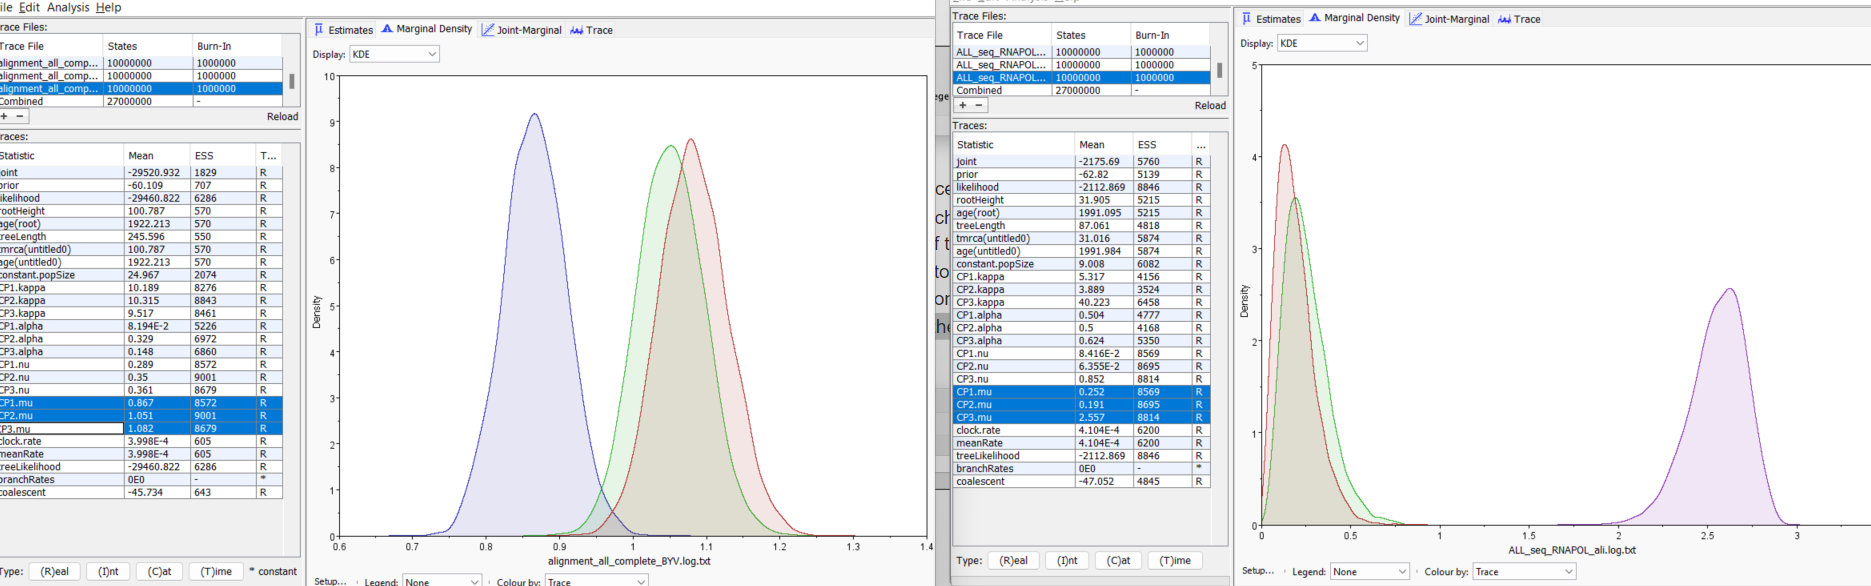